# Data Programming - Problem Set 3
Miguel Sanchez

## Question 1

Occupations
<p></p>
Step 1. Import the necessary libraries
<p></p>
Step 2. Import the dataset from this address.
<p></p>
Step 3. Assign it to a variable called users
<p></p>
Step 4. Discover what is the mean age per occupation
<p></p>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least Step 6. For each occupation, calculate the minimum and maximum ages
<p></p>
Step 7. For each combination of occupation and sex, calculate the mean age
<p></p>
Step 8. For each occupation present the percentage of women and men

In [324]:
#Step 1
from urllib.request import urlopen
import pandas as pd

#Step 2
response = urlopen("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user")
txt=response.read().decode()

word=""
rows=[]
plist=[]
for i in txt:
    if(i=="\n"):
        plist.append(word)
        word=""
        rows.append(plist)
        plist=[]
    elif(i=="|"):
        plist.append(word)
        word=""
    else:
        word+=i
        
#Step 3
users = pd.DataFrame(rows,columns=rows[0])
users=users.drop(0)
print("Step 3")
print(users)

#Step 4
users['age'] = users['age'].astype('int64')
print("\n Step 4")
print(users.groupby('occupation').mean('age'))

#Step 5 *ratio is the cuantity?
male=users[users["gender"]=="M"]
ratio=male["occupation"].value_counts()/len(male["occupation"])*100
print("\n Step 5")
print(ratio)

#Step 6
print("\n Step 6")
print(users.groupby('occupation').agg({'age': ['min', 'max']}))

#Step 7
print("\n Step 7")
print(pd.pivot_table(users,users.groupby('user_id').mean('age'),'occupation', 'gender'))

#Step 8
print("\n Step 8")
maleOcc=male.groupby('occupation').count()['user_id']
femOcc=(users[users["gender"]=="F"]).groupby('occupation').count()['user_id']
occ=pd.DataFrame({'Male':maleOcc, 'Female': femOcc})
occ=occ.fillna(0)
occ['Total']=occ.apply(lambda x: x['Male']+x['Female'],axis=1)
occ['%M']=occ.apply(lambda x: x['Male']/x['Total']*100,axis=1)
occ['%F']=occ.apply(lambda x: x['Female']/x['Total']*100,axis=1)
occ=occ.round(2)
print(occ[['%M','%F']])

Step 3
    user_id age gender     occupation zip_code
1         1  24      M     technician    85711
2         2  53      F          other    94043
3         3  23      M         writer    32067
4         4  24      M     technician    43537
5         5  33      F          other    15213
..      ...  ..    ...            ...      ...
939     939  26      F        student    33319
940     940  32      M  administrator    02215
941     941  20      M        student    97229
942     942  48      F      librarian    78209
943     943  22      M        student    77841

[943 rows x 5 columns]

 Step 4
                     age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523

## Question 2
Euro Teams
<p></p>
Step 1. Import the necessary libraries
<p></p>
Step 2. Import the dataset from this address
<p></p>
Step 3. Assign it to a variable called euro12
<p></p>
Step 4. Select only the Goal column
<p></p>
Step 5. How many team participated in the Euro2012?
<p></p>
Step 6. What is the number of columns in the dataset?
<p></p>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
<p></p>
Step 8. Sort the teams by Red Cards, then to Yellow Cards
<p></p>
Step 9. Calculate the mean Yellow Cards given per Team
<p></p>
Step 10. Filter teams that scored more than 6 goals
<p></p>
Step 11. Select the teams that start with G
<p></p>
Step 12. Select the first 7 columns
<p></p>
Step 13. Select all columns except the last 3
<p></p>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [330]:
#Step 1
import pandas as pd

#Step 2,3
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

#Step 4
print("Step 4")
print(euro12['Goals'])

#Step 5
print("\n Step 5")
print(euro12['Team'].count())

#Step 6
print("\n Step 6")
noColumns=euro12.columns.size
print(noColumns)

#Step 7
print("\n Step 7")
discipline = pd.DataFrame({'Team':euro12['Team'], 'Yellow Cards': euro12['Yellow Cards'],'Red Cards':euro12['Red Cards']})
print(discipline)

#Step 8
print("\n Step 8")
print(discipline.sort_values(by=['Red Cards', 'Yellow Cards'],ascending=False))

#Step 9
print("\n Step 9")
print(discipline.groupby('Team').mean('Yellow Cards')['Yellow Cards'])

#Step 10
print("\n Step 10")
print((euro12[euro12['Goals']>6])[['Team','Goals']])

#Step 11
print("\n Step 11")
print((euro12[euro12.Team.str.contains('G')])['Team'])

#Step 12
print("\n Step 12")
print(euro12.iloc[:,[0,1,2,3,4,5,6]])

#Step 13
print("\n Step 13")
print(euro12[euro12.columns[:noColumns-3]])

#Step 14
print("\n Step 14")
counSelec=euro12[euro12.Team.isin(['England','Italy','Russia'])]
print(counSelec[['Team','Shooting Accuracy']])

Step 4
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

 Step 5
16

 Step 6
35

 Step 7
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15    

## Question 3
Housing
<p></p>
Step 1. Import the necessary libraries
<p></p>
Step 2. Create 3 differents Series, each of length 100, as follows:
<p></p>
• The first a random number from 1 to 4
<p></p>
• The second a random number from 1 to 3
<p></p>
• The third a random number from 10,000 to 30,000
<p></p>
Step 3. Create a DataFrame by joinning the Series by column
<p></p>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
<p></p>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
<p></p>
Step 6. Ops it seems it is going only until index 99. Is it true? 
<p></p>
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [331]:
#Step 1
import numpy as np
import pandas as pd

#Step 2
print("Step 2")
one=pd.Series(np.random.randint(1,4,100))
two=pd.Series(np.random.randint(1,3,100))
three=pd.Series(np.random.randint(10000,30000,100))
print(one)
print(two)
print(three)

#Step 3,4
print("\n Step 3,4")
data=pd.DataFrame({'bedrs':one, 'bathrs': two,'price_sqr_meter': three})
print(data)

#Step 5,6
print("\n Step 5,6")
bigcolumn=pd.DataFrame(pd.concat([one,two,three]))
print(bigcolumn)
print('Yes, the index goes until 99')

#Step 7
print("\n Step 7")
#bigcolumn.set_index(np.arange(0,299,1))
bigcolumn=pd.DataFrame(bigcolumn).set_index(np.arange(0,300,1))
print(bigcolumn)

Step 2
0     3
1     3
2     2
3     3
4     2
     ..
95    1
96    2
97    1
98    1
99    3
Length: 100, dtype: int64
0     1
1     2
2     1
3     2
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int64
0     23185
1     23447
2     27924
3     22926
4     14552
      ...  
95    16578
96    22431
97    28998
98    24803
99    14498
Length: 100, dtype: int64

 Step 3,4
    bedrs  bathrs  price_sqr_meter
0       3       1            23185
1       3       2            23447
2       2       1            27924
3       3       2            22926
4       2       1            14552
..    ...     ...              ...
95      1       1            16578
96      2       1            22431
97      1       1            28998
98      1       1            24803
99      3       1            14498

[100 rows x 3 columns]

 Step 5,6
        0
0       3
1       3
2       2
3       3
4       2
..    ...
95  16578
96  22431
97  28998
98  24803
99  14498

[300 rows x 1 column

## Question 4
Wind Statistics
<p></p>
Step 1. Import the necessary libraries
<p></p>
Step 2. Import the dataset from the attached file wind.txt
<p></p>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
<p></p>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
<p></p>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
<p></p>
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
<p></p>
Step 7. Compute how many non-missing values there are in total.
<p></p>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
<p></p>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
<p></p>
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
<p></p>
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
<p></p>
Step 12. Downsample the record to a yearly frequency for each location.
<p></p>
Step 13. Downsample the record to a monthly frequency for each location.
<p></p>
Step 14. Downsample the record to a weekly frequency for each location.
<p></p>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [335]:
#Step 1
import pandas as pd
import datetime

#Step 2
print("Step 2")
wind = pd.read_csv('wind.txt', sep='\s+', engine='python')
print(wind)

#Step 3
print("\n Step 3")
wind["index"] = wind.apply(lambda x: datetime.date(int(2000+x["Yr"]), int(x["Mo"]), int(x["Dy"])), axis=1)
data = wind.set_index('index')
print(data)

#Step 4
print("\n Step 4")
data["Yr"] = data.apply(lambda x: int(x['Yr']+1900),axis=1)
print(data)

#Step 5
print("\n Step 5")
data["index2"] = data.apply(lambda x: datetime.date(int(x["Yr"]), int(x["Mo"]), int(x["Dy"])), axis=1)
data["index2"]=data["index2"].astype('datetime64')
data = data.set_index('index2')
data=data.drop('Yr',axis = 1)
data=data.drop('Mo',axis = 1)
data=data.drop('Dy',axis = 1)
print(data)
print(data.index)

#Step 6
print("\n Step 6")
print(data.isnull().sum())

#Step 7
print("\n Step 7")
print(data.notnull().sum())
data=data.dropna()

#Step 8
print("\n Step 8")
windspeeds=pd.DataFrame(pd.concat([data['RPT'],data['VAL'],data['ROS'],data['KIL'],data['SHA'],data['BIR'],data['DUB'],data['CLA'],data['MUL'],data['CLO'],data['BEL'],data['MAL']]))
print(windspeeds.mean())

#Step 9
print("\n Step 9")
loc_stats=data.agg(['min', 'max','mean','std'])
print(loc_stats)
    
#Step 10
print("\n Step 10")
day_stats=pd.DataFrame({'min':data.min(axis=1),'max':data.max(axis=1),'mean':data.mean(axis=1),'std':data.std(axis=1)})
print(day_stats)

#Step 11
print("\n Step 11")
jan=data.groupby(data.index.month).mean()
print(jan[:1])

#Step 12
print("\n Step 12")
print(data.resample('Y').mean())

#Step 13
print("\n Step 13")
print(data.resample('M').mean())

#Step 14
print("\n Step 14")
print(data.resample('W').mean())

#Step 15
print("\n Step 15")
Wmin=data.resample('W').min().min(axis=1)
Wmax=data.resample('W').max().max(axis=1)
Wmean=data.resample('W').mean().mean(axis=1)
Wstd=data.resample('W').std().std(axis=1)
f52=pd.DataFrame({'min':Wmin,'max':Wmax,'mean':Wmean,'std':Wstd})
print(f52[:52])

Step 2
      Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA  \
0     61   1   1  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25   
1     61   1   2  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   
2     61   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   
3     61   1   4  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   
4     61   1   5  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54   
...   ..  ..  ..    ...    ...    ...    ...    ...    ...    ...    ...   
6569  78  12  27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59   
6570  78  12  28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25   
6571  78  12  29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46   
6572  78  12  30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87   
6573  78  12  31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63   

        MUL    CLO    BEL    MAL  
0     10.83  12.58  18.50  15.04  
1      9.7

             min    max       mean       std
index2                                      
1961-01-08  1.79  16.62   9.272333  0.995185
1961-01-15  0.50  20.71   8.353214  0.778587
1961-01-22  1.04  17.75   8.460417  0.566966
1961-01-29  6.04  27.63  16.143472  0.426143
1961-02-05  3.63  24.21  11.800357  1.084578
1961-02-12  8.08  26.38  15.891548  1.032779
1961-02-19  3.42  28.62  13.558056  1.141446
1961-02-26  2.21  25.80  12.604286  0.793856
1961-03-05  5.50  23.45  11.375000  1.075213
1961-03-12  1.71  22.71   9.820000  0.740791
1961-03-19  2.75  22.95  11.756310  0.729070
1961-03-26  2.58  22.50  10.462857  0.694830
1961-04-02  1.46  18.63   9.407000  0.752930
1961-04-09  3.21  18.29   9.412381  0.707974
1961-04-16  1.54  16.17   6.845595  0.845824
1961-04-23  0.83  21.09  10.146667  0.908260
1961-04-30  1.38  17.50   7.445000  0.855743
1961-05-07  3.83  28.08  13.164048  1.632137
1961-05-14  1.04  26.30   8.086944  1.533170
1961-05-21  3.17  15.96   7.452639  0.990164
1961-05-28

## Question 5
Step 1. Import the necessary libraries
<p></p>
Step 2. Import the dataset from this address.
<p></p>
Step 3. Assign it to a variable called chipo.
<p></p>
Step 4. See the first 10 entries
<p></p>
Step 5. What is the number of observations in the dataset?
<p></p>
Step 6. What is the number of columns in the dataset?
<p></p>
Step 7. Print the name of all the columns.
<p></p>
Step 8. How is the dataset indexed?
<p></p>
Step 9. Which was the most-ordered item?
<p></p>
Step 10. For the most-ordered item, how many items were ordered?
<p></p>
Step 11. What was the most ordered item in the choice_description column? 
<p></p>
Step 12. How many items were orderd in total?
<p></p>
Step 13.
• Turn the item price into a float
<p></p>
• Check the item price type
<p></p>
• Create a lambda function and change the type of item price
<p></p>
• Check the item price type
<p></p>
Step 14. How much was the revenue for the period in the dataset? 
<p></p>
Step 15. How many orders were made in the period?
<p></p>
Step 16. What is the average revenue amount per order?
<p></p>
Step 17. How many different items are sold?

In [336]:
#Step 1
import pandas as pd

#Step 2,3
print("Step 2,3")
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',delimiter='\t')
print(chipo)

#Step 4
print("\n Step 4")
print(chipo[:10])

#Step 5
print("\n Step 5")
print(len(chipo))

#Step 6
print("\n Step 6")
print(chipo.columns.size)

#Step 7
print("\n Step 7")
print(chipo.columns)

#Step 8
print("\n Step 8")
print(chipo.index)

#Step 9
print("\n Step 9")
print(chipo['item_name'].mode())

#Step 10
print("\n Step 10")
print(chipo[chipo["item_name"]=="Chicken Bowl"]['quantity'].sum())

#Step 11
print("\n Step 11")
print(chipo['choice_description'].mode())

#Step 12
print("\n Step 12")
print(chipo['quantity'].sum())

#Step 13
print("\n Step 13")
chipo['item_price']=(chipo['item_price'].apply(lambda x: x[1:])).astype('float64')
print(chipo['item_price'])

#Step 14
print("\n Step 14")
print((chipo.apply(lambda x: x['quantity']*x['item_price'],axis=1)).sum())

#Step 15
print("\n Step 15")
print(chipo['order_id'].count())

#Step 16
print("\n Step 16")
print((chipo.apply(lambda x: x['quantity']*x['item_price'],axis=1)).mean())

#Step 17
print("\n Step 17")
print(len(chipo.drop_duplicates(['item_name'], keep='last')))

Step 2,3
      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clem

## Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

Text(0, 0.5, 'Frequency per 1000')

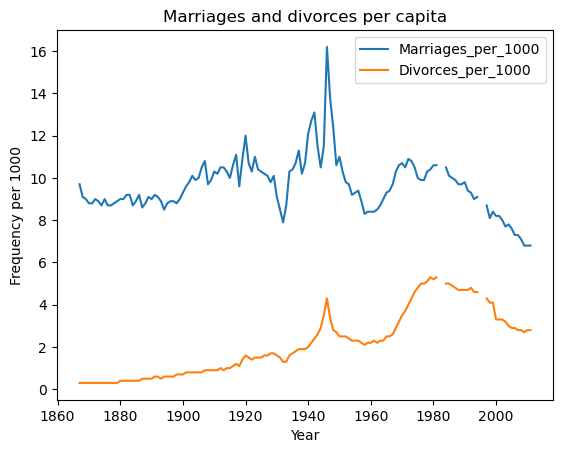

In [251]:
import pandas as pd
import matplotlib.pyplot as plt

mrg = pd.read_csv('us-marriages-divorces-1867-2014.csv')
columns=mrg[['Marriages_per_1000', 'Divorces_per_1000']]

x_data =mrg['Year']

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data, mrg[column])

ax.set_title('Marriages and divorces per capita')
ax.legend(columns)
ax.set_xlabel('Year')
ax.set_ylabel('Frequency per 1000')

## Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

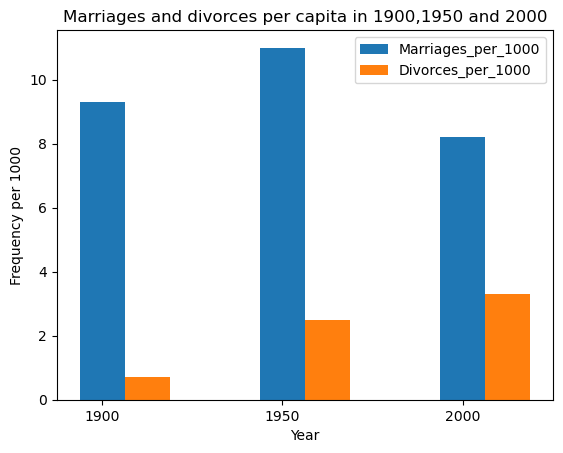

In [267]:
import pandas as pd
import matplotlib.pyplot as pl

mrg = pd.read_csv('us-marriages-divorces-1867-2014.csv')
filtered=mrg[mrg.Year.isin([1900,1950,2000])]

n = len(filtered.index)
x = np.arange(n)
width = 0.25
plt.bar(x, filtered.Marriages_per_1000, width=width, label='Marriages_per_1000')
plt.bar(x+ width, filtered.Divorces_per_1000, width=width, label='Divorces_per_1000')
plt.xticks(x, filtered['Year'])
plt.legend(loc='best')
plt.title('Marriages and divorces per capita in 1900,1950 and 2000')
plt.xlabel('Year')
plt.ylabel('Frequency per 1000')
plt.show()

## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

Text(0, 0.5, "Actor's name")

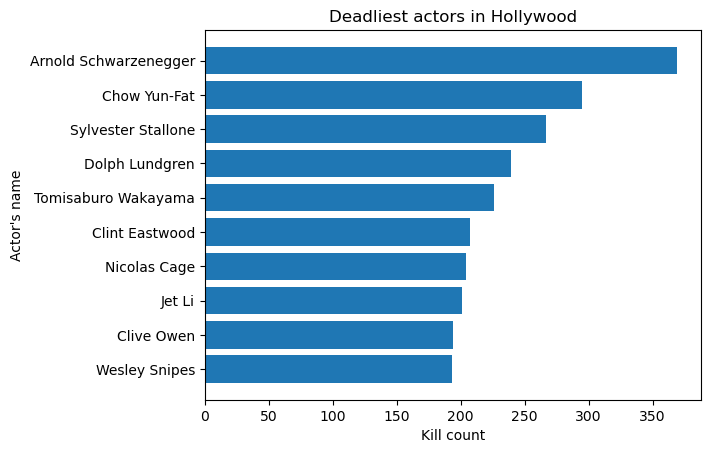

In [289]:
import pandas as pd
import matplotlib.pyplot as plt

hlwd = pd.read_csv('actor_kill_counts.csv')
hlwd=hlwd.sort_values(by=['Count'])

plt.barh(hlwd['Actor'],hlwd['Count'])
plt.title('Deadliest actors in Hollywood')
plt.xlabel('Kill count')
plt.ylabel("Actor's name")

## Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
<p></p>
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

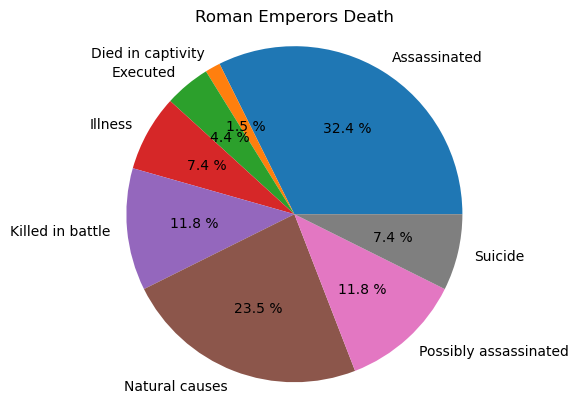

In [288]:
import pandas as pd

roEm = pd.read_csv('roman-emperor-reigns.csv')
death=roEm.groupby('Cause_of_Death').count()

plt.pie(death['Emperor'], labels=death.index, autopct="%0.1f %%")
plt.axis("equal")
plt.title('Roman Emperors Death')
plt.show()

## Question 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
<p></p>
Don't forget to label your axes! 
<p></p>
Color each dot according to its year.

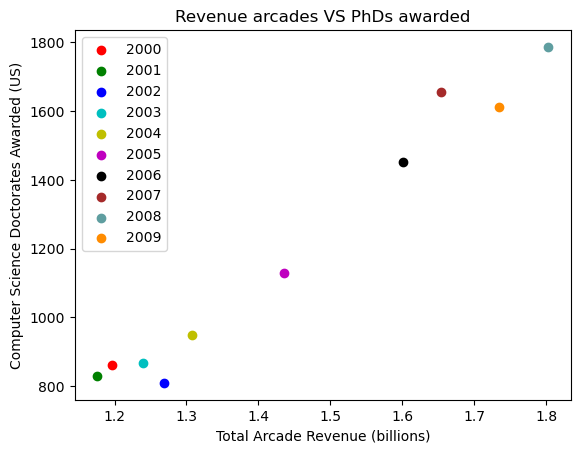

In [301]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

colors = {2000:'r', 2001:'g',2002:'b',2003:'c',2004:'y',2005:'m',2006:'k',2007:'brown',2008:'cadetblue',2009:'darkorange'}
fig, ax = plt.subplots()

for i in range(len(data['Total Arcade Revenue (billions)'])):
    ax.scatter(data['Total Arcade Revenue (billions)'][i], data['Computer Science Doctorates Awarded (US)'][i],color=colors[data['Year'][i]])

ax.set_title('Revenue arcades VS PhDs awarded')
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')
ax.legend(data['Year'])
